<a href="https://colab.research.google.com/github/tiq015UCSD/Email_Delivery_Experiment_on_Account_Funding_Rate_Improvement/blob/main/Tian_Qin_Conversion_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimizing Customer Conversion Rate

- We have data about users who hit an E-commerce site. We know some of their characteristics, such as their country, marketing channel, age, whether they are repeat users, and the number of pages visited during that session. We also know whether they converted or not.

- The goal is to come up with recommendations for the product and the marketing teams to improve conversion rate.


# Set the dataset

In [304]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [305]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [306]:
%matplotlib inline

In [307]:
# Load the data
df = pd.read_csv('/content/drive/My Drive/Project/prj3/conversion_project.csv')

In [308]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [309]:
# Information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


There is no null value in the data.

In [310]:
# Description of data
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


The age could have some outliers, so it's better to remove the people whose age is over 100.

In [311]:
# Remove the age over 100
df = df[df['age'] <= 100]

# Exploratory Data Analysis

## Overall Conversion Rate

In [312]:
# Count of conversion
df_convert_count = df['converted'].value_counts()
df_convert_count

0    306000
1     10198
Name: converted, dtype: int64

In [313]:
# Overall Conversion Rate
conversion_rate = df['converted'].mean()
conversion_rate

0.03225194340255157

## Country

In [314]:
# Country
df_country = df.groupby('country')['converted'].mean().to_frame('conversion_rate').reset_index()

In [315]:
df_country

,country,conversion_rate
0,China,0.001332
1,Germany,0.062428
2,UK,0.052612
3,US,0.037801


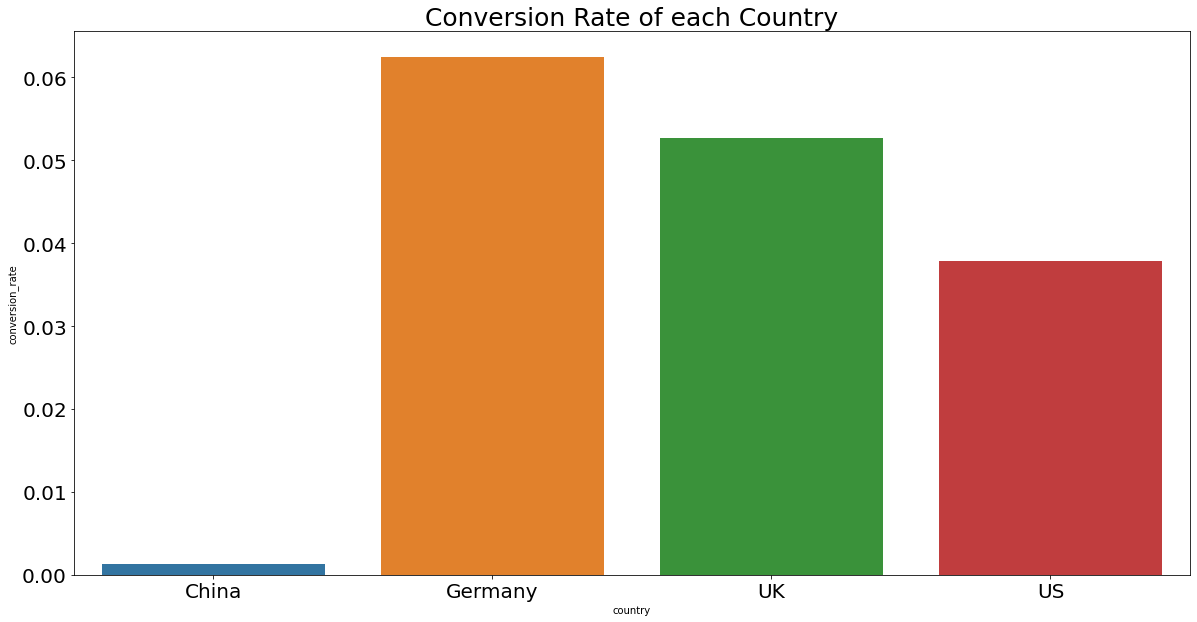

In [316]:
# The bar plot of conversion rate of each country
plt.figure(figsize=(20,10))
sns.barplot(data=df_country, x='country',y='conversion_rate')
plt.title('Conversion Rate of each Country', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

The bar plot shows that Germany has highest conversion rate, and that value in China is lowest.

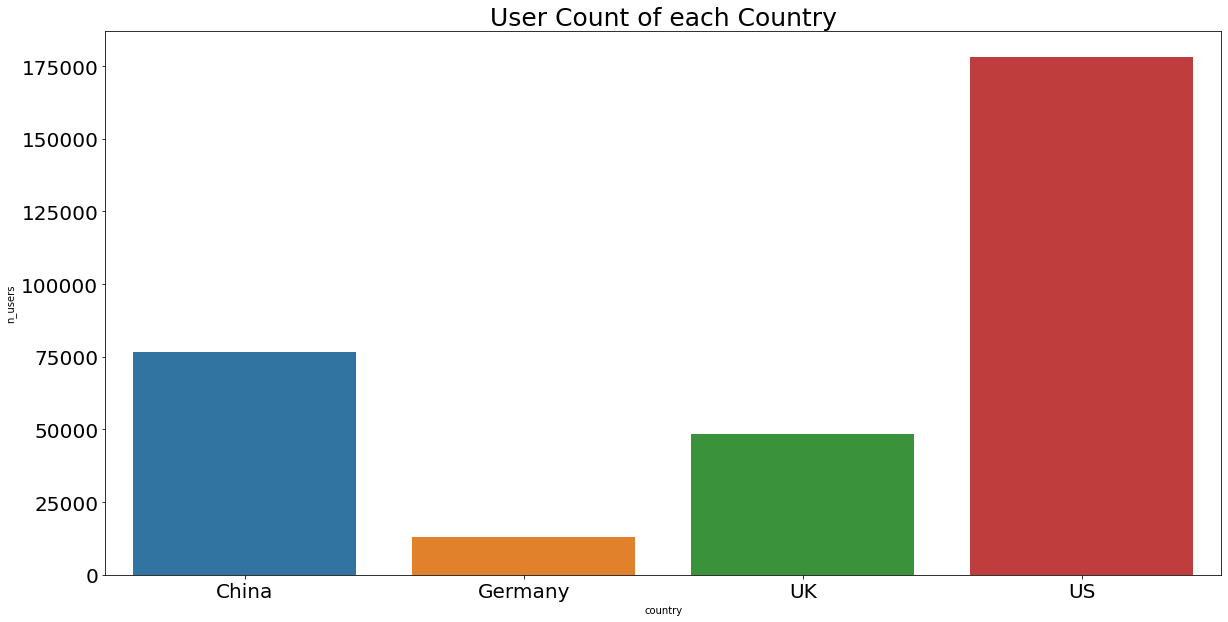

In [317]:
# The bar plot of user number of each country
df_country_count = df.groupby('country')['age'].count().to_frame('n_users').reset_index()
plt.figure(figsize=(20,10))
sns.barplot(data=df_country_count, x='country',y='n_users')
plt.title('User Count of each Country', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Even if users from Germany have highest conversion rate, the number of sample is small, it's better to collect more date for users in China, Germany and UK to keep sample balance.

## Age

In [318]:
# Conversion rate by age
df_age = df.groupby('age')['converted'].mean().reset_index()\

In [319]:
df_age.head()

,age,converted
0,17,0.071607
1,18,0.066029
2,19,0.058616
3,20,0.057109
4,21,0.053985


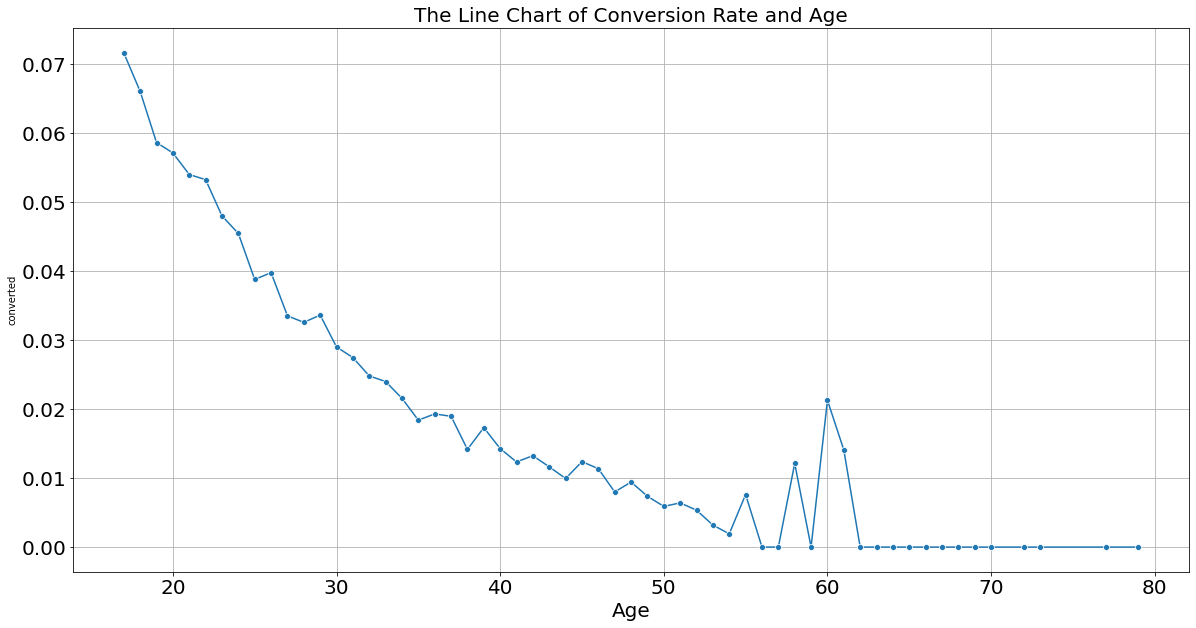

In [320]:
# line chart of conversion rate by age
plt.figure(figsize=(20,10))
sns.lineplot(data=df_age, x='age', y='converted', marker='o')
plt.title('The Line Chart of Conversion Rate and Age', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Age', fontsize=20)
plt.grid(True)
plt.show()

The conversion rates are decreased with the increasing of age. Besides, there is a fluctuation about the age of 55 to 60.




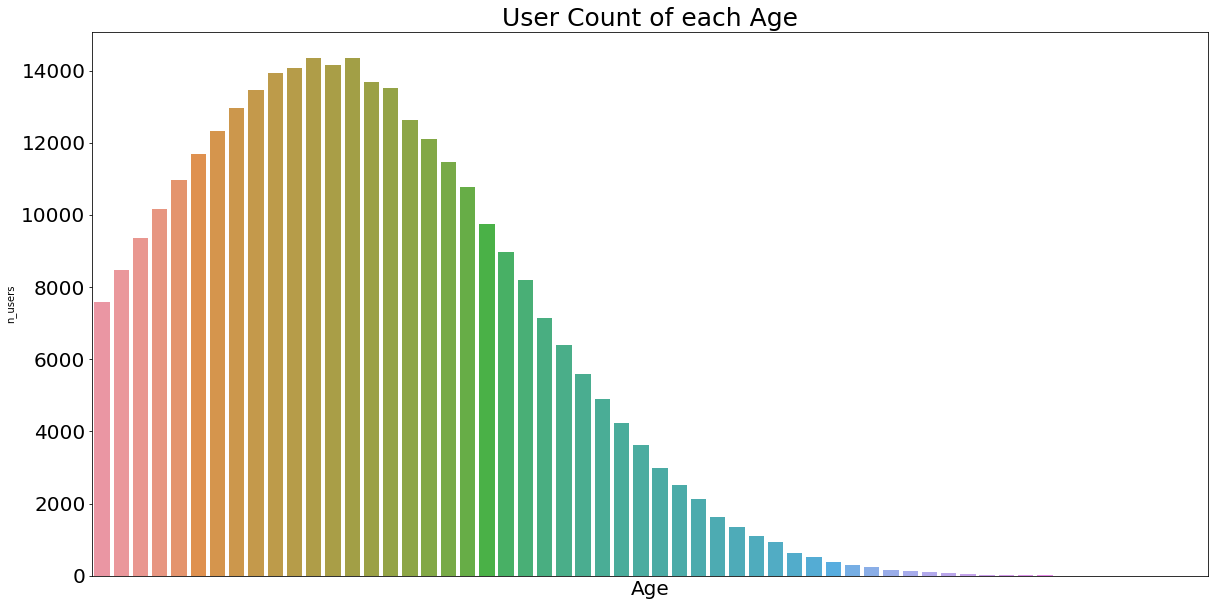

In [321]:
# The bar plot of user number of each age
df_age_count = df.groupby('age')['country'].count().to_frame('n_users').reset_index()
plt.figure(figsize=(20,10))
sns.barplot(data=df_age_count, x='age',y='n_users')
plt.title('User Count of each Age', fontsize=25)
plt.tick_params(bottom=False, labelbottom=False)
plt.yticks(fontsize=20)
plt.xlabel('Age', fontsize=20)
plt.show()

The distribution of user count for each age is right skewed, which means most users are young.

## New User

In [322]:
# New User
df_new_user = df.groupby('new_user')['converted'].mean().to_frame('conversion_rate').reset_index()

In [323]:
df_new_user

,new_user,conversion_rate
0,0,0.071983
1,1,0.014021


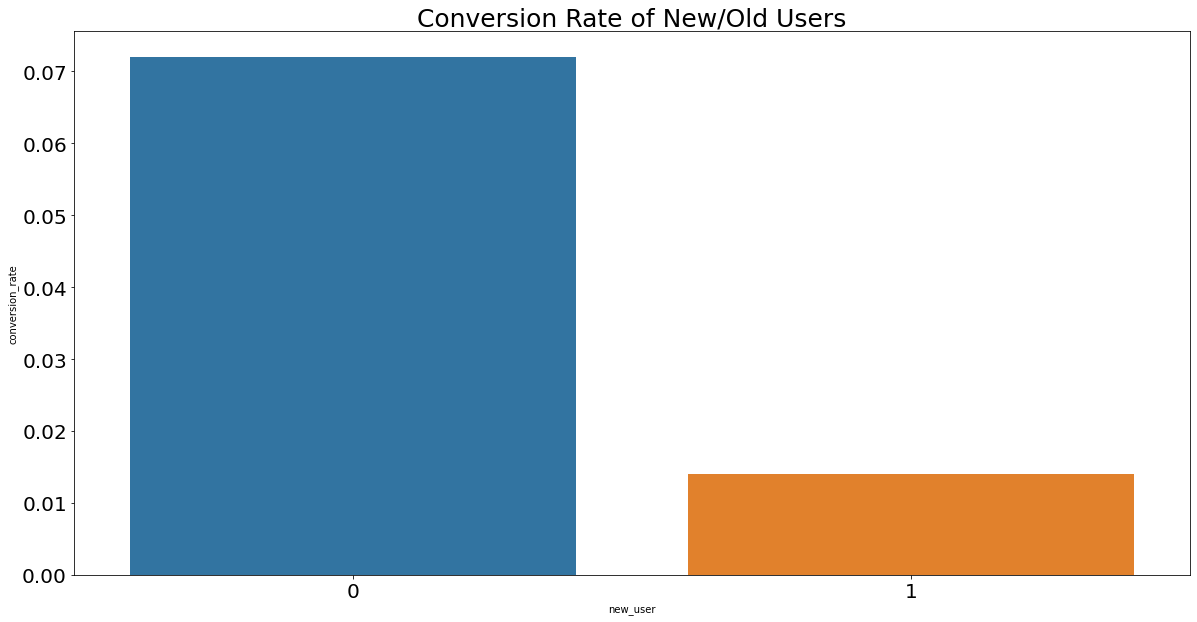

In [324]:
# The bar plot of conversion rate of new/old users
plt.figure(figsize=(20,10))
sns.barplot(data=df_new_user, x='new_user',y='conversion_rate')
plt.title('Conversion Rate of New/Old Users', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

The conversion rate of old users is much greater than new users.

## Source

In [325]:
# Source
df_source = df.groupby('source')['converted'].mean().to_frame('conversion_rate').reset_index()

In [326]:
df_source

,source,conversion_rate
0,Ads,0.034472
1,Direct,0.028169
2,Seo,0.032888


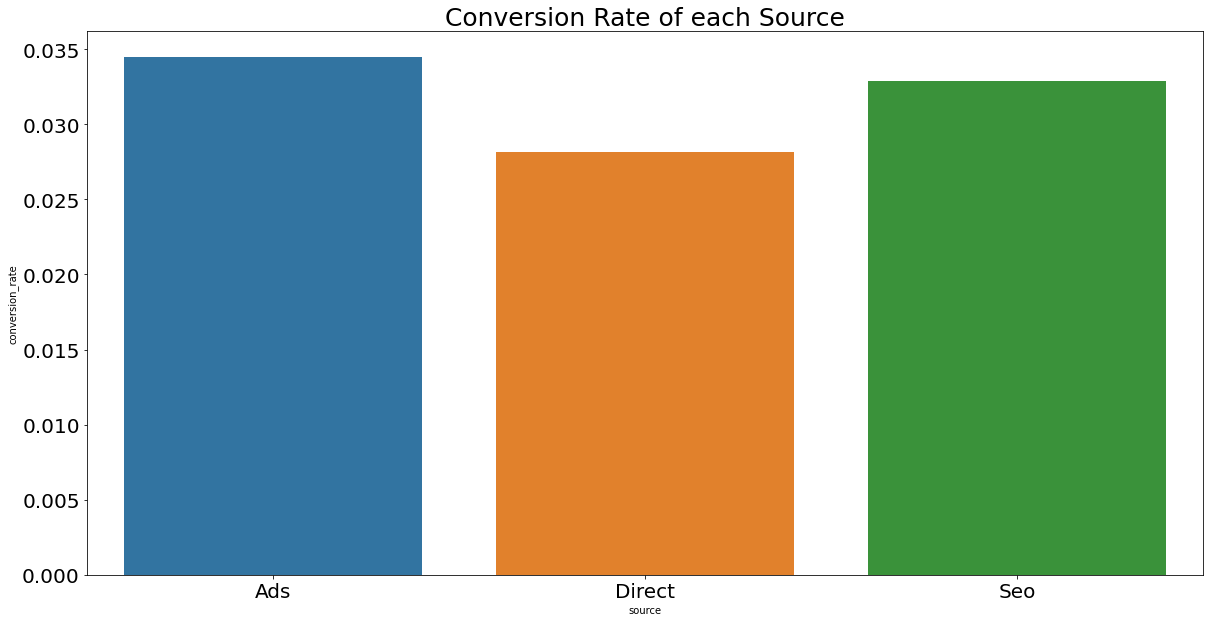

In [327]:
# The bar plot of conversion rate of each source
plt.figure(figsize=(20,10))
sns.barplot(data=df_source, x='source',y='conversion_rate')
plt.title('Conversion Rate of each Source', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Ads has highest conversion rate, but three sourses do not have a large gap between the conversion rate.

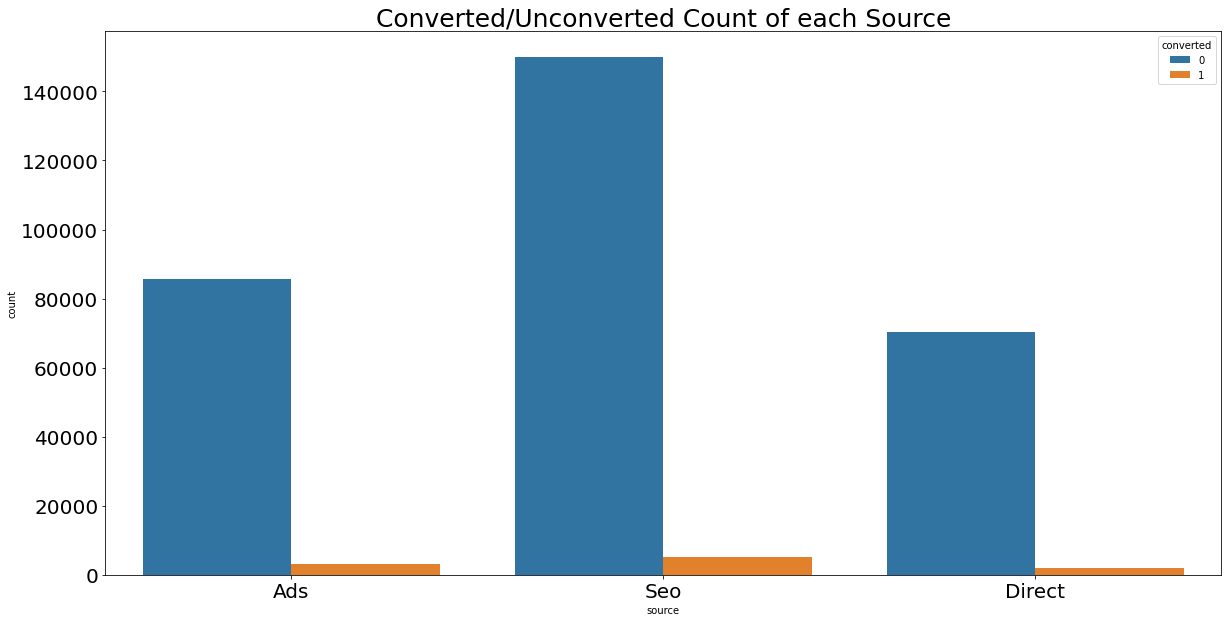

In [328]:
# The bar plot of user number of each source
plt.figure(figsize=(20,10))
sns.countplot(x='source', hue='converted', data=df)
plt.title('Converted/Unconverted Count of each Source', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

The source Seo could attract more users and have more converted users. Besides it's conversion rate is also high. 

## 	Total Pages Visited

In [329]:
# Total_pages_visited
df_tpv = df.groupby('total_pages_visited')['converted'].mean().to_frame('conversion_rate').reset_index()

In [330]:
df_tpv.head()

,total_pages_visited,conversion_rate
0,1,0.000000
1,2,0.000228
2,3,0.000251
3,4,0.000780
4,5,0.001570


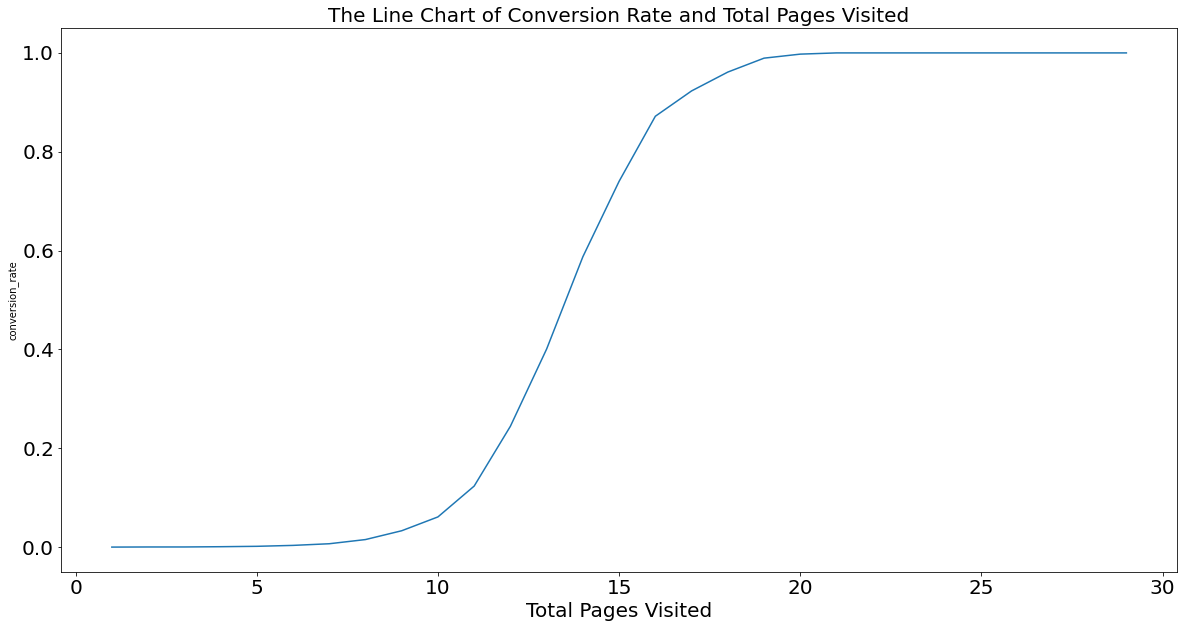

In [331]:
# line chart of conversion rate by total_pages_visited
plt.figure(figsize=(20,10))
sns.lineplot(data=df_tpv, x='total_pages_visited', y='conversion_rate')
plt.title('The Line Chart of Conversion Rate and Total Pages Visited', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Total Pages Visited', fontsize=20)
plt.show()

As the total number of pages visited increases, the conversion rate also increase. 

# Prediction Model

## Create Dummy Variables

In [332]:
# Create dummy variables
df_dummy = df.copy()
dummy_country = pd.get_dummies(df_dummy['country'], prefix='country', drop_first=True)
dummy_source = pd.get_dummies(df_dummy['source'], prefix='source', drop_first=True)

In [333]:
df_dummy = pd.concat([dummy_country, dummy_source, df_dummy.loc[:, ~df_dummy.columns.isin(['country', 'source'])]], axis=1)

In [334]:
df_dummy.head()

,country_Germany,country_UK,country_US,source_Direct,source_Seo,age,new_user,total_pages_visited,converted
0,0,1,0,0,0,25,1,1,0
1,0,0,1,0,1,23,1,5,0
2,0,0,1,0,1,28,1,4,0
3,0,0,0,0,1,39,1,5,0
4,0,0,1,0,1,30,1,6,0


## Split Training and Test Set

In [335]:
# split training and test set
from sklearn.model_selection import train_test_split
x = df_dummy.drop('converted', axis=1)
y = df_dummy['converted']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
x_train.shape, x_test.shape

((221338, 8), (94860, 8))

## Logistic Regression Model

In [336]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [337]:
# Coeff of logistic regression
lg_intercept = logreg.intercept_
lg_coeff = logreg.coef_
lg_coef_list = list(lg_coeff[0,:])
lg_coef_df = pd.DataFrame({'Feature': list(x_train.columns),'Coefficient': lg_coef_list})
lg_coef_df

,Feature,Coefficient
0,country_Germany,3.591861
1,country_UK,3.346357
2,country_US,2.977645
3,source_Direct,-0.170791
4,source_Seo,-0.007893
5,age,-0.076694
6,new_user,-1.671401
7,total_pages_visited,0.757529


In [338]:
# Accuracy of logistic regression
logreg_pred_prob = logreg.predict_proba(x_test)[:,1]
logreg_pred = logreg.predict(x_test)
logreg_acc = logreg.score(x_test, y_test)
print('Accuracy of Logistic Regression is: %f' % logreg_acc)

Accuracy of Logistic Regression is: 0.986053


In [339]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

lg_cm = pd.DataFrame(confusion_matrix(y_test, logreg_pred))
lg_cm['Total'] = np.sum(lg_cm, axis=1)
lg_cm = lg_cm.append(np.sum(lg_cm, axis=0), ignore_index=True)
lg_cm.columns = ['Predicted_0', 'Predicted_1', 'Total']
lg_cm = lg_cm.set_index([['Actual_0', 'Actual_1', 'Total']])

lg_cm

,Predicted_0,Predicted_1,Total
Actual_0,91483,363,91846
Actual_1,960,2054,3014
Total,92443,2417,94860


In [340]:
# Stat Report
from sklearn.metrics import classification_report
lg_report = classification_report(y_test, logreg_pred)
print(lg_report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     91846
           1       0.85      0.68      0.76      3014

    accuracy                           0.99     94860
   macro avg       0.92      0.84      0.87     94860
weighted avg       0.99      0.99      0.99     94860



## Random Forest

In [341]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=42)
RF.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [342]:
# Accuracy of Random Forest
RF_pred = RF.predict(x_test)
RF_acc = RF.score(x_test, y_test)
print('Accuracy of Random Forest is: %f' % RF_acc)

Accuracy of Random Forest is: 0.984641


In [343]:
# Stat Report
RF_report = classification_report(y_test, RF_pred)
print(RF_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     91846
           1       0.81      0.67      0.73      3014

    accuracy                           0.98     94860
   macro avg       0.90      0.83      0.86     94860
weighted avg       0.98      0.98      0.98     94860



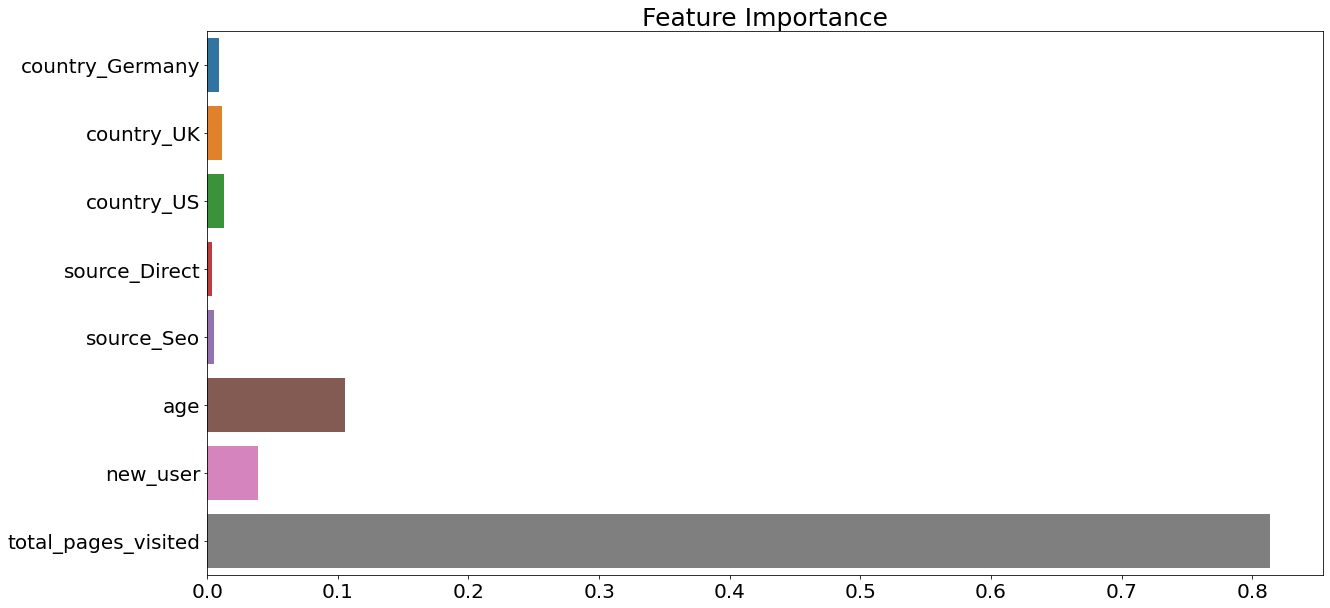

In [344]:
# Feature importance
plt.figure(figsize=(20,10))
sns.barplot(x=RF.feature_importances_, y=x.columns)
plt.title('Feature Importance', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

## ROC Curve and AUC

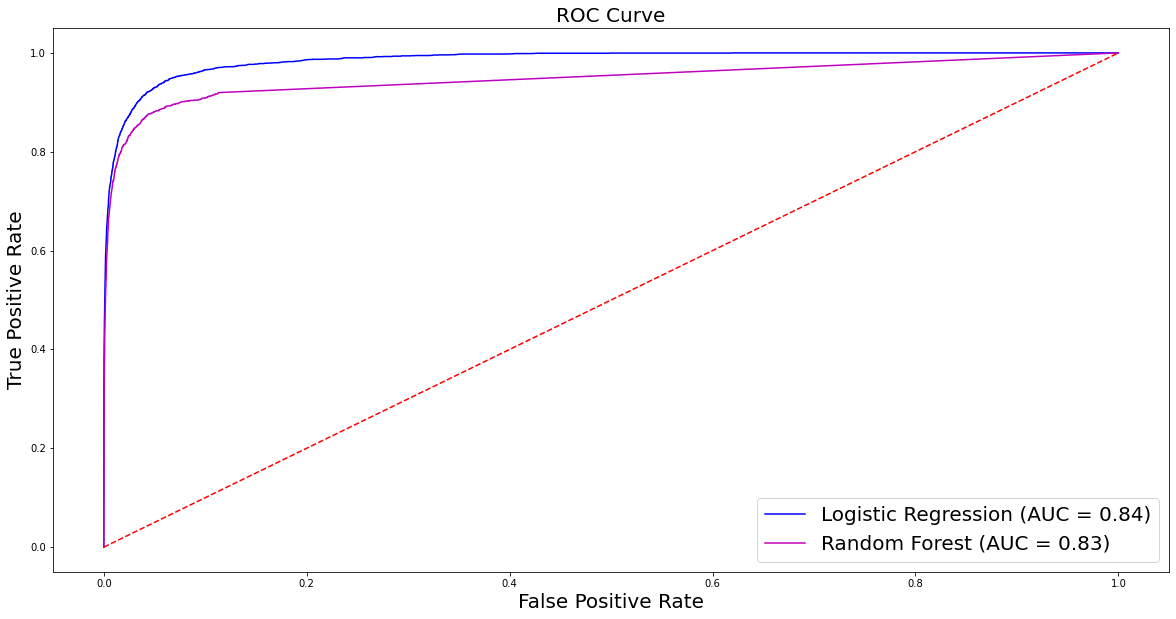

In [345]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg_pred)
log_fpr, log_tpr, log_thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
rf_roc_auc = roc_auc_score(y_test, RF_pred)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, RF.predict_proba(x_test)[:,1])

plt.figure(figsize=(20,10))
plt.plot(log_fpr, log_tpr, color = 'b', label='Logistic Regression (AUC = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, color = 'm', label='Random Forest (AUC = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.title('ROC Curve', fontsize=20)
plt.legend(loc="lower right", fontsize=20)
plt.show()

Random Forest has highest prediction accuracy and AUC, it performs better than logistic regression models.

# Conclusion

1. As shown in the age performance plots, the young users are more likely to be converted, so marketing should pay more attention to attract on young users.
2. The old accounts have more conversion rate than new users, so marketing team could conduct email campaign to convert more old accounts back.
3. Even if the Germany users have highest conversion rate, the number of sample in Germany is too small than other country, it is better to get more data in Germany. By the way, marketing team should still need to attract more users in Germany for high conversion rate.
4. The conversion rate in China is very low which is not really common, so it is necessary to figure out if there is anything wrong on strategry in China.
5. The total pages visited shows the highest importance with the conversion rate which is extremely differet with other features. However, total pages visited could be effected by the action of a purchase, since people could read more because of their purchase, but not leading a purchase. Therefore the feature total_pages_visited could be a misleading feature that will influence the analysis, it's better to remove this feature.